Missing values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


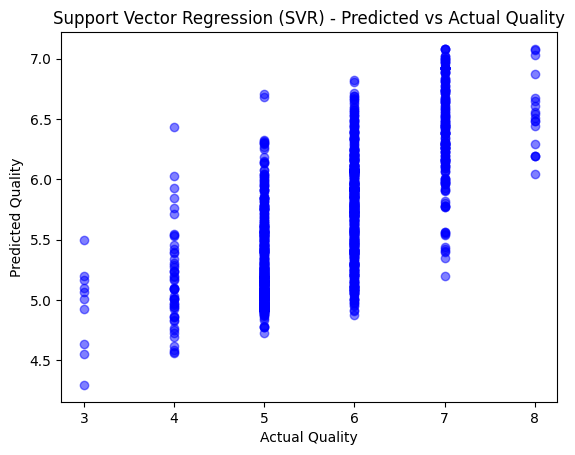

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Step 1: Load the Wine Quality Dataset
# Replace 'Automobile_data.csv' with 'winequality-red.csv' and ensure it's located in the same directory
data = pd.read_csv('/content/winequality-red.csv')

# Step 2: Data Cleaning
# Check for any missing values in the dataset
print("Missing values in the dataset:\n", data.isnull().sum())

# Fill missing values if any (though winequality-red dataset typically has no missing values)
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 3: Extract Independent and Dependent Variables
# We'll use all features except 'quality' as input, and 'quality' as the target
X = data.drop(columns=['quality']).values  # Independent variables
y = data['quality'].values  # Target variable (quality)

# Step 4: Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten y for SVR compatibility

# Step 5: Fit the SVR Model
regressor = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel
regressor.fit(X_scaled, y_scaled)

# Step 6: Predict with SVR
y_pred_scaled = regressor.predict(X_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Convert predictions back to original scale

# Step 7: Visualize Results
# Scatter plot of actual quality vs predicted quality
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.title('Support Vector Regression (SVR) - Predicted vs Actual Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()
